# **Lab Analysis of Algorithms UNCode**

## **1. Fibonacci Number**

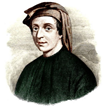

Recall the definition of Fibonacci sequence: 
$$𝐹_0 = 0, 𝐹_1 = 1,$$ and 
$$𝐹_𝑖 = 𝐹_{𝑖−1} +𝐹_{𝑖−2} \text{ for  } 𝑖 ≥ 2.$$
Your goal in this problem is to implement an efficient algorithm for computing Fibonacci numbers. The following naive recursive algorithm for computing Fibonacci 

```python
Fibonacci(𝑛):
if 𝑛 ≤ 1: return 𝑛
return  Fibonacci(𝑛 − 1) + Fibonacci(𝑛 − 2)
```
Try compiling and running a starter solution on your machine. You will see that
computing, say, $𝐹_{40}$ already takes noticeable time.
Another way to appreciate the dramatic difference between an exponential time algorithm
and a polynomial time algorithm is to use the following visualization by David
Galles: http://www.cs.usfca.edu/~galles/visualization/DPFib.html. Try computing
$𝐹_{20}$ by a recursive algorithm by entering “20” and pressing the “Fibonacci Recursive”
button. You will see an endless number of recursive calls. Now, press “Skip
Forward” to stop the current algorithm and call the iterative algorithm by pressing
“Fibonacci Table”. This will compute $𝐹_{20}$ very quickly. (Note that the visualization
uses a slightly different definition of Fibonacci numbers: 𝐹0 = 1 instead of 𝐹0 = 0.
This of course has almost no influence on the running time.)

---

###**Problem Description**

**Task:** Given an integer $𝑛$, find the 𝑛th Fibonacci number $𝐹_𝑛$.

**Input Format:** The input consists of a single integer $n$.

**Constraints:** 0 ≤ 𝑛 ≤ 45.

**Output Format:** Output $F_n$.


**Sample testcase**

```python
#run this sample testcase on a cell to help you validate your solution
fibonacci_fast(10)

#𝐹_{10}= 55
#  --> Expected output: 55
```
---

**Solution**

### Naive Algorithm

**Test Cases:**

In [ ]:
def fib_recursive(n):
    if(n <= 1):
      return n
    else:
      return fib_recursive(n-1) + fib_recursive(n-2)

**Test Cases:**

In [ ]:
%%time
fib_recursive(1)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11 µs


1

In [ ]:
%%time
fib_recursive(10)

CPU times: user 43 µs, sys: 6 µs, total: 49 µs
Wall time: 53.4 µs


55

In [ ]:
#Do not change this function's name, parameters or output format. It will be used in automatic grading.

def fibonacci_fast(n):
  
  fib_numbers = [0] * (n+1)

  fib_numbers[0] = 0
  fib_numbers[1] = 1

  for i in range(2, n+1):
    fib_numbers[i] = fib_numbers[i-1] + fib_numbers[i-2]
  
  return fib_numbers[n]

#**|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||**#

**Test Cases:**

In [ ]:
%%time
fibonacci_fast(10)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs


0

In [ ]:
%%time
fibonacci_fast(100000)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


0

## **2. Last Digit of a Large Fibonacci Number**

Your goal in this problem is to find the last digit of 𝑛-th Fibonacci number. Recall that Fibonacci numbers
grow exponentially fast.For example:


$F_{200} = 280 571 172 992 510 140 037 611 932 413 038 677 189 525$

Therefore, a solution like


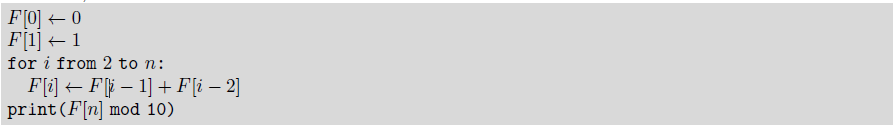


will turn out to be too slow, because as $i$ grows the $i$th iteration of the loop computes the sum of longer and longer numbers. Also, for example, $F_1000$ does not fit into the standard C++ int type. To overcome this difficulty, you may want to store in $F[i]$ not the $i$th Fibonacci number itself, but just its last digit (that is, $F_i$ mod 10). Computing the last digit of $F_i$ is easy: it is just the last digit of the sum of the last digits of
$F_{i-1}$ and $F_{i-2}$:

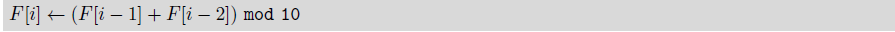


This way, all F[$i$]’s are just digits, so they fit perfectly into any standard integer type, and computing a sum
of F[$i$ − 1] and F[$i$ − 2] is performed very quickly.





---

###**Problem Description**

**Task:** Given an integer $n$, find the last digit of the $n$th Fibonacci number 𝐹𝑛 (that is, $F_n$ mod 10).

**Input Format:** The input consists of a single integer $n$.

**Constraints:** $0 \leq n \leq 10^7$.

**Output Format:** Output the last digit of $F_n$.




**Sample testcase**

```python
#run this sample testcase on a cell to help you validate your solution
last_fibonacci_digit(331)

#𝐹_331 = 668 996 615 388 005 031 531 000 081 241 745 415 306 766 517 246 774 551 964 595 292 186 469.
#  --> Expected output: 9
```

---

# **Solution (Naive)**

In [ ]:
#Do not change this function's name, parameters or output format. It will be used in automatic grading.

def last_fibonacci_digit(n):

    if n <= 1:
        return n

    previous = 0
    current  = 1

    for _ in range(n - 1):
        previous, current = current, (previous + current) % 10

    return current


#**|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||**#

# **3. Greatest Common Divisor**


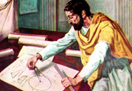

The greatest common divisor $GCD(a, b)$ of two non-negative integers $a$ and $b$
(which are not both equal to 0) is the greatest integer $d$ that divides both $a$ and $b$ Your goal in this problem is to implement the Euclidean algorithm for computing the greatest common divisor.
Efficient algorithm for computing the greatest common divisor is an important
basic primitive of commonly used cryptographic algorithms like RSA.

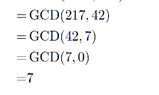

---

###**Problem Description**


**Task:** Given two integers $a$ and $b$, find their greatest common divisor.

**Input Format:** The two integers $a$, $b$ are given.

**Constraints:** $1 \leq a,b \leq 2*10^9$.

**Output Format:** Output $GCD(a, b)$.


**Sample testcase**

```python
#run this sample testcase on a cell to help you validate your solution
euclidean_algorithm(28851538,1183019)

#28851538 = 17657 · 1634
#1183019  = 17657 · 67

#  --> Expected output: 17657
```

---

### Naive Algorithm

In [ ]:
def gcd_naive(a, b):
  gcd_value = 1
  for i in range(1, a+1):
    if (a % i == 0) and (b % i == 0):
      gcd_value = i
  
  return gcd_value

**Test Cases:**

In [ ]:
%%time
gcd_naive(12310, 34234)

CPU times: user 1.97 ms, sys: 0 ns, total: 1.97 ms
Wall time: 1.99 ms


2

**Solution**

In [ ]:
#Do not change this function's name, parameters or output format. It will be used in automatic grading.

def euclidean_algorithm(a,b):
  
  if b == 0:
    return a
  
  return euclidean_algorithm(b, a%b)

In [ ]:
%%time
euclidean_algorithm(12310, 32234)

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 15.5 µs


2

# **4. Least Common Multiple**
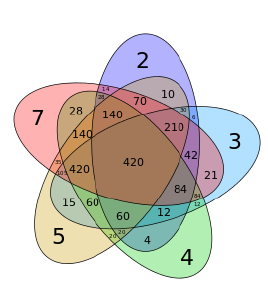

The least common multiple of two positive integers $a$ and $b$ is the least positiveinteger $m$ that is divisible by both $a$ and $b$

---

###**Problem Description**


**Task:** Given two integers $a$ and $b$, find their least common multiple.

**Input Format:** The two integers$a$ and $b$ are given in the same line separated by space.

**Constraints:** $1 \leq a,b \leq 107$.

**Output Format:** Output the least common multiple of  $a$ and $b$


**Sample testcase**

```python
#run this sample testcase on a cell to help you validate your solution

least_common_multiple(6,8)

#  --> Expected output: 24

least_common_multiple(761457,614573)

#  --> Expected output: 467970912861
```

---

In [ ]:
#Do not change this function's name, parameters or output format. It will be used in automatic grading.

def least_common_multiple(a,b):
    return a*b//euclidean_algorithm(a, b)

In [ ]:
%%time
print(least_common_multiple(213124,51252))

2730757812
CPU times: user 0 ns, sys: 704 µs, total: 704 µs
Wall time: 712 µs


## Fibonacci Number Again

In [ ]:
def calc_fib(n):
    if n <= 1:
        return n  
    else:
        fib_numbers = [0] * (n+1)
        fib_numbers[0] = 0
        fib_numbers[1] = 1

        for i in range(2, n+1):
            fib_numbers[i] = fib_numbers[i-1] + fib_numbers[i-2]
          
    return fib_numbers[n]

def pisano_period(m):
	pisano_value = -1

	begin_loop = False
	
	prev_val = -1	
	i = 0
	while(pisano_value < 0):
		current_val = calc_fib(i) % m
		if(prev_val == 0 and current_val == 1):
			if(not begin_loop):
				begin_loop = True
				number_init_loop = i
			else:
				pisano_value = i - number_init_loop
				
		prev_val = current_val
		i += 1
	
	return pisano_value

def fast_fib_module(n, m):
	if n < m:
		n = calc_fib(n)
	else:
		pisano_value = pisano_period(m)
		n = calc_fib(n % pisano_value)

	return n % m

## Last Digit of the Sum of Fibonacci Numbers

In [ ]:
PISANO_PERIOD_SUM_DIGIT = 60

def calc_fib_sum(n):
    if n <= 1:
        return n  
    else:
        fib_numbers = [0] * (n+1)
        fib_numbers[0] = 0
        fib_numbers[1] = 1

        for i in range(2, n+1):
            fib_numbers[i] = fib_numbers[i-1] + fib_numbers[i-2]
          
    return sum(fib_numbers)

def get_fibonacci_last_digit_sum(n):
    return calc_fib_sum(n % PISANO_PERIOD_SUM_DIGIT) % 10

## Last Digit of the Sum of Fibonacci Numbers Again

In [ ]:
def calc_fib_sum(n):

    if n <= 1:
        return [n]
    else:
        fib_numbers = [0] * (n+1)
        fib_numbers[0] = 0
        fib_numbers[1] = 1

        for i in range(2, n+1):
            fib_numbers[i] = fib_numbers[i-1] + fib_numbers[i-2]
          
    return fib_numbers

def get_fibonacci_partial_sum(m, n):
    aux = m
    m = m % PISANO_PERIOD_SUM_DIGIT
    n = n % PISANO_PERIOD_SUM_DIGIT

    total = sum(calc_fib_sum(n))
    total -= sum(calc_fib_sum(m)[:-1])

    return total % 10

## Last Digit of the Sum of Squares of Fibonacci Numbers

In [ ]:
PISANO_PERIOD = 60

def pisano_num(n):
   previous, current = 0, 1
   n=n%PISANO_PERIOD
   if n <= 0:
	   return n
   else:
       for _ in range(2,n+1):
           previous, current= current, (previous + current)%PISANO_PERIOD
       return current
       

## Other Approaches



In [ ]:
#assumes [[1,0],[0,1]] is the identity matrix
def matrixProduct(matrixA,matrixB):
    """ for square matrices return the product AB"""
    n = len(matrixA)   
    result = [[sum([matrixA[k][j]*matrixB[i][k] for k in range(n)]) for j in range(n)]for i in range(n)]
    #what code does but it's better to not also create a zeros matrix 
    #for i in range(n):
     #   for j in range(n):
      #          result[i][j] = sum([matrixA[k][j]*matrixB[i][k] for k in range(n)]) 
                #asummes i indicates row (first index)
                #and j indicates colummn (second index)


    return result

def matrixSquare(matrix):
    return matrixProduct(matrix,matrix)
m = matrixSquare






def getNpower(matrix,N):
    """"
    uses binary decomposition to compute matrix exponentiation in log n steps 
    """

    assert(len(matrix)==len(matrix[1]))
    size = len(matrix)

    result=[[(1 if i==j else 0) for i in range(size)] for j in range(size)] ##identity 
    bN=bin(N)[::-1]
    decompSteps = len(bin(N))-2 ## account for the 0b character
    auxMatrix=matrix
    ## performs first step

    for i in range(decompSteps):
        if(bN[i]=='1'): ##
            result = matrixProduct(auxMatrix,result)
        auxMatrix = matrixSquare(auxMatrix)

    return result
def fibonacciP(n):
    n = int(n)
    return getNpower([[0,1],[1,1]],n)[0][1]

print(fibonacciP(input())%10)

12412412
9


In [ ]:
def sumOfFibsTelescope(n,mod):
  """ 
  uses formula for n sum of fib numbers that's a telescope of all others
  """
  return (fibonacciP(n+1)-1)%mod


## Coursera Screenshots

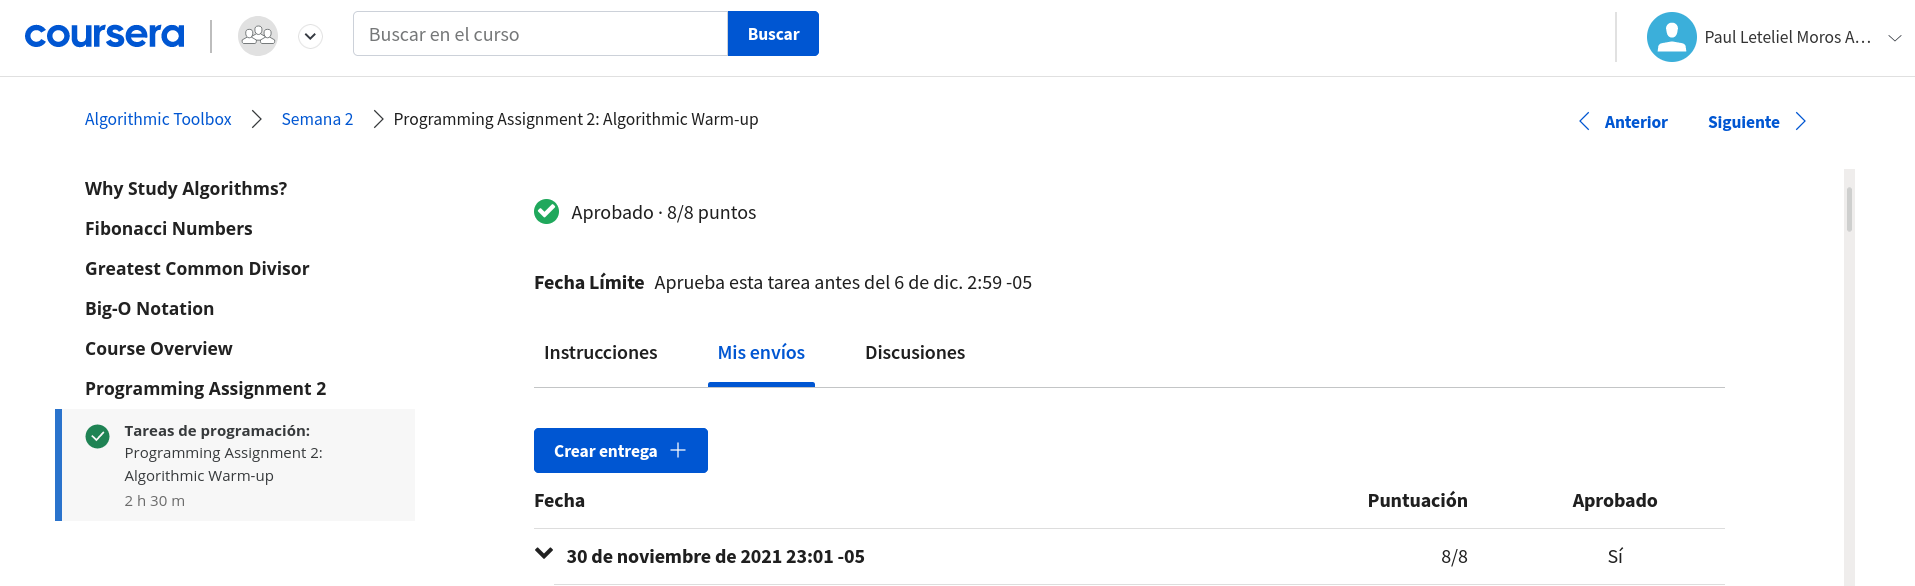

Pedro Grisales

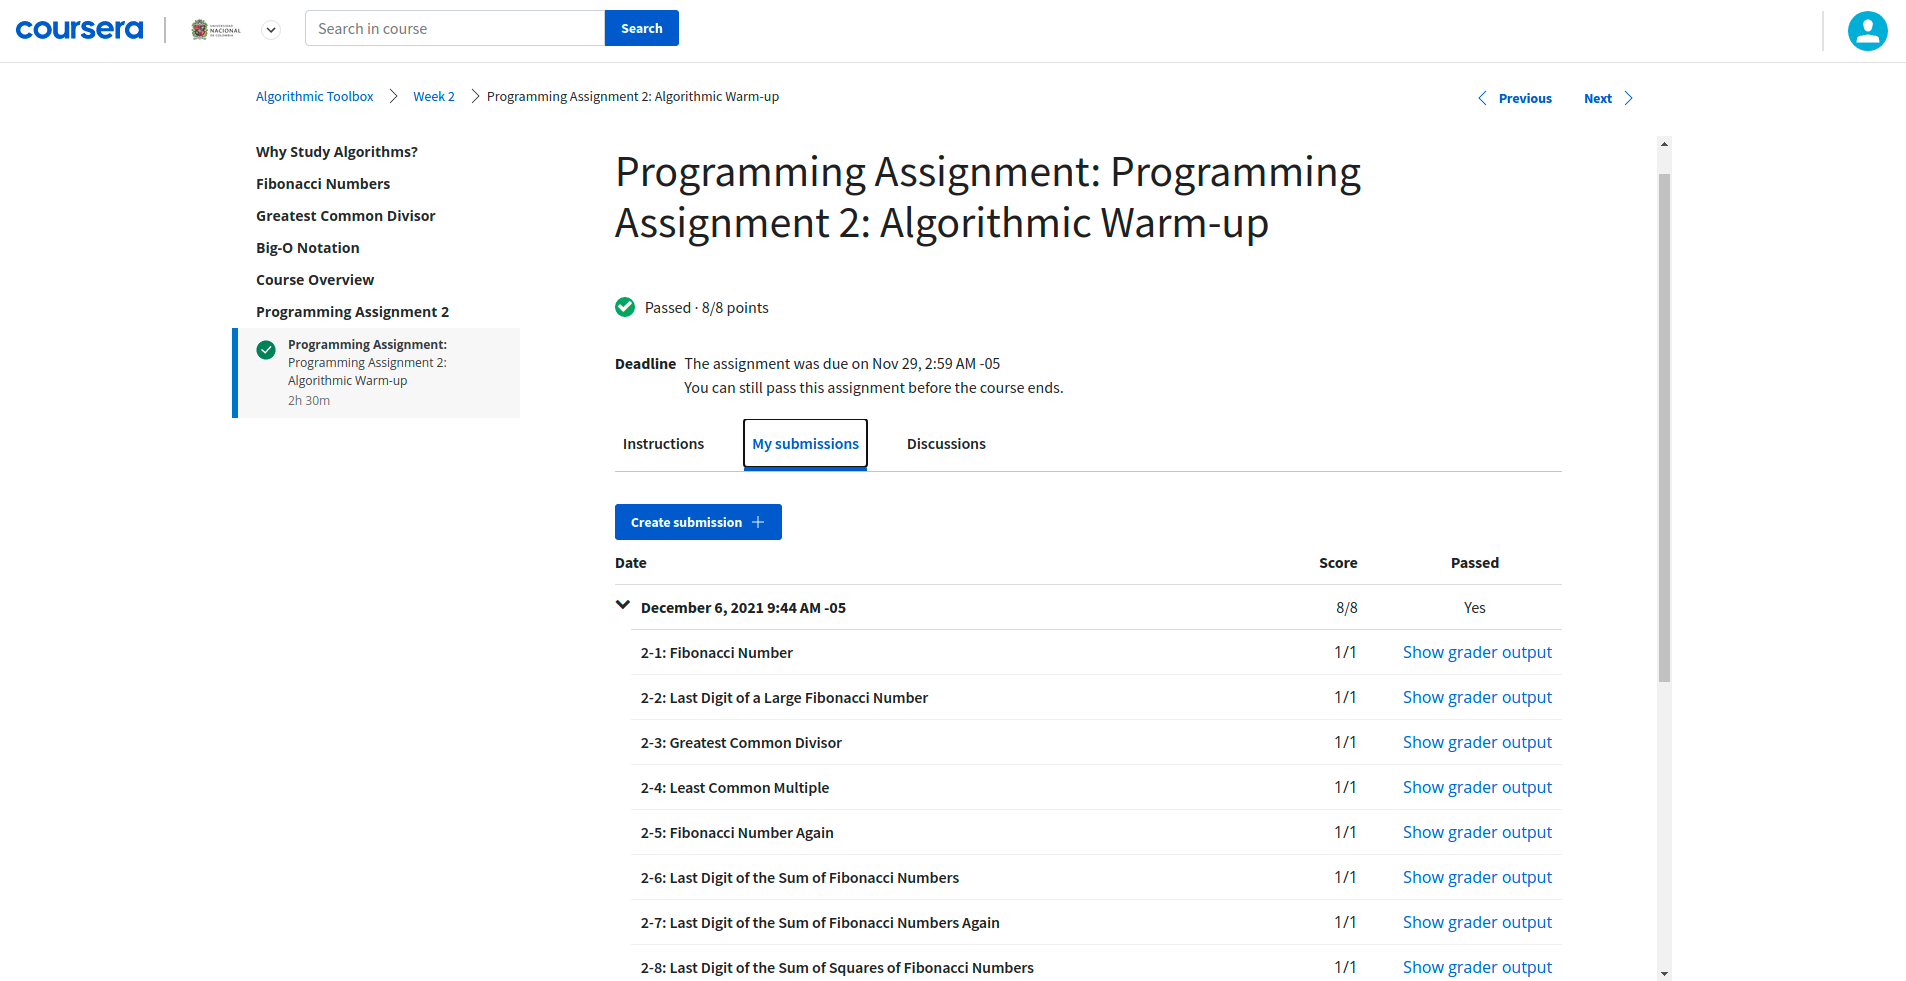

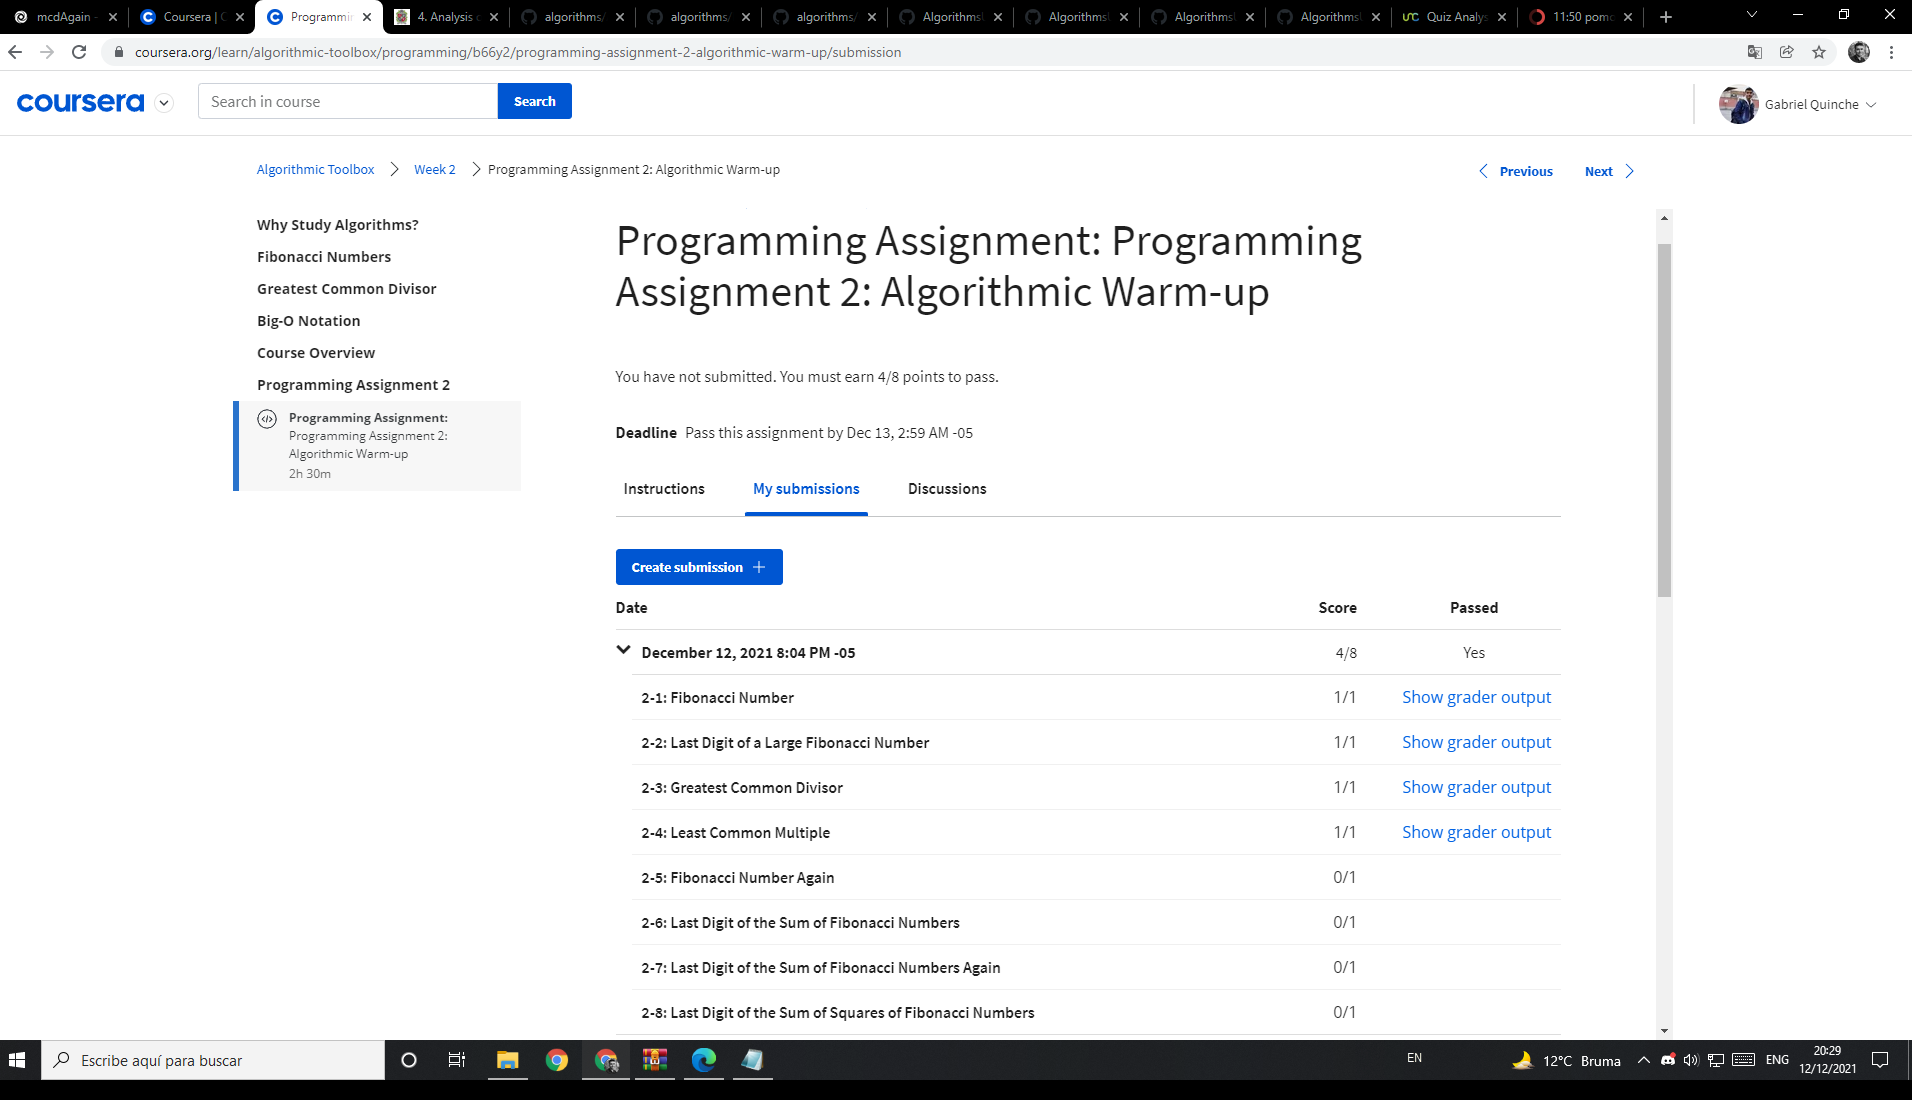